# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_train["CODE_GENDER"].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [5]:
app_train[app_train["CODE_GENDER"]=="XNA"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,1,XNA,1,1,0,207000.0,382500.0,19125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,1,XNA,0,1,2,157500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,1,XNA,0,1,1,135000.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,1,XNA,1,1,0,247500.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


In [6]:
app_train["CODE_GENDER"].nunique()

3

In [7]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [8]:
app_train.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
DAYS_EMPLOYED_ANOM                 2
Length: 123, dtype: int64

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [9]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                   -0.002108
TARGET                        1.000000
NAME_CONTRACT_TYPE           -0.030896
FLAG_OWN_CAR                 -0.021851
FLAG_OWN_REALTY              -0.006148
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
DAYS_EMPLOYED_ANOM           -0.045987
Name: TARGET, Length: 110, dtype: float64

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [10]:
corr_df = app_train.corr()['TARGET']

In [11]:
corr_df.sort_values().head(n=15)

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
Name: TARGET, dtype: float64

In [12]:
corr_df.sort_values(ascending=False).head(n=16)

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
Name: TARGET, dtype: float64

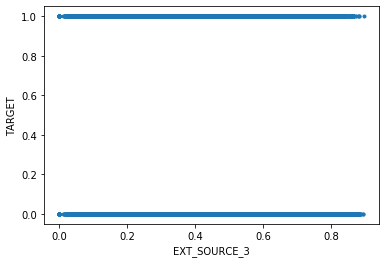

Correlation: nan


In [18]:
# 如果直接畫散布圖 - 看不出任何趨勢或形態
plt.plot(app_train['EXT_SOURCE_3'] , app_train['TARGET'], '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET')
plt.show()
corr = np.corrcoef(app_train['EXT_SOURCE_3'] , app_train['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))

In [15]:
corr

array([[nan, nan],
       [nan,  1.]])

In [23]:
app_train['EXT_SOURCE_3'].unique()

array([1.39375780e-01,            nan, 7.29566691e-01, 6.21226338e-01,
       4.92060094e-01, 5.40654450e-01, 7.51723715e-01, 3.63945239e-01,
       6.52896552e-01, 1.76652579e-01, 7.70087070e-01, 6.78567689e-01,
       6.21030378e-02, 5.56727426e-01, 4.77649155e-01, 5.42445144e-01,
       3.58951229e-01, 6.69056695e-01, 5.65607981e-01, 4.61482391e-01,
       1.90705948e-01, 6.59405532e-01, 5.24496446e-01, 4.10102573e-01,
       7.98137231e-01, 4.11848556e-01, 7.54406173e-01, 7.22392890e-01,
       6.05836265e-01, 3.20163367e-01, 3.99675616e-01, 6.84827659e-01,
       4.75849909e-01, 7.28141299e-01, 4.66864006e-01, 4.79448981e-01,
       3.09275356e-01, 7.99296783e-01, 7.01695774e-01, 7.38019620e-01,
       7.01088438e-02, 1.69428727e-01, 5.13693766e-01, 7.07699345e-01,
       3.39287700e-01, 6.97146908e-01, 4.34733249e-01, 2.34015167e-01,
       9.50703958e-02, 5.62060483e-01, 4.29423684e-01, 4.13596760e-01,
       8.32785025e-01, 3.94495405e-01, 5.97192427e-01, 6.94092643e-01,
      

In [19]:
np.log(app_train['EXT_SOURCE_3']).unique()

array([-1.97058154,         nan, -0.3153045 , -0.47605979, -0.70915443,
       -0.61497493, -0.28538642, -1.01075187, -0.42633658, -1.7335703 ,
       -0.26125169, -0.38777104, -2.77896037, -0.58567952, -0.7388788 ,
       -0.61166832, -1.02456875, -0.40188648, -0.56985405, -0.77331138,
       -1.65702258, -0.41641656, -0.64531663, -0.89134797, -0.22547473,
       -0.88709958, -0.28182436, -0.32518612, -0.50114552, -1.13892389,
       -0.91710202, -0.37858807, -0.74265279, -0.31726016, -0.76171727,
       -0.73511779, -1.17352328, -0.22402296, -0.35425534, -0.30378487,
       -2.65770633, -1.77532293, -0.66612798, -0.34573593, -1.08090686,
       -0.36075912, -0.83302266, -1.45236935, -2.35313765, -0.57614581,
       -0.84531124, -0.88286379, -0.18297974, -0.93014779, -0.51551589,
       -0.36514984, -1.6163616 , -1.65118949, -0.89560895, -0.62497231,
       -0.79289335, -0.32719361, -0.43900205, -1.07139933, -0.19286296,
       -0.669642  , -0.44415148, -1.11454913, -1.4745425 , -2.55

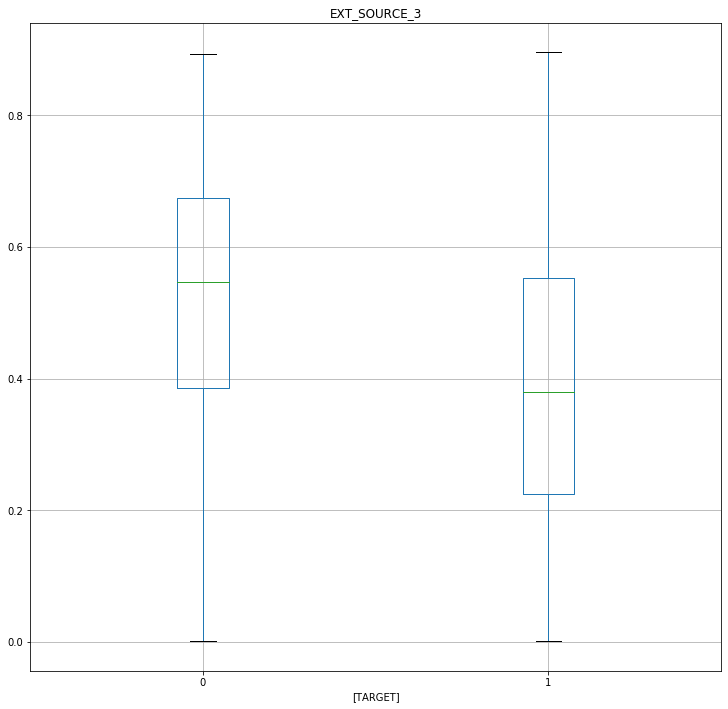

In [21]:
plt_column = 'EXT_SOURCE_3'
plt_by = ['TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

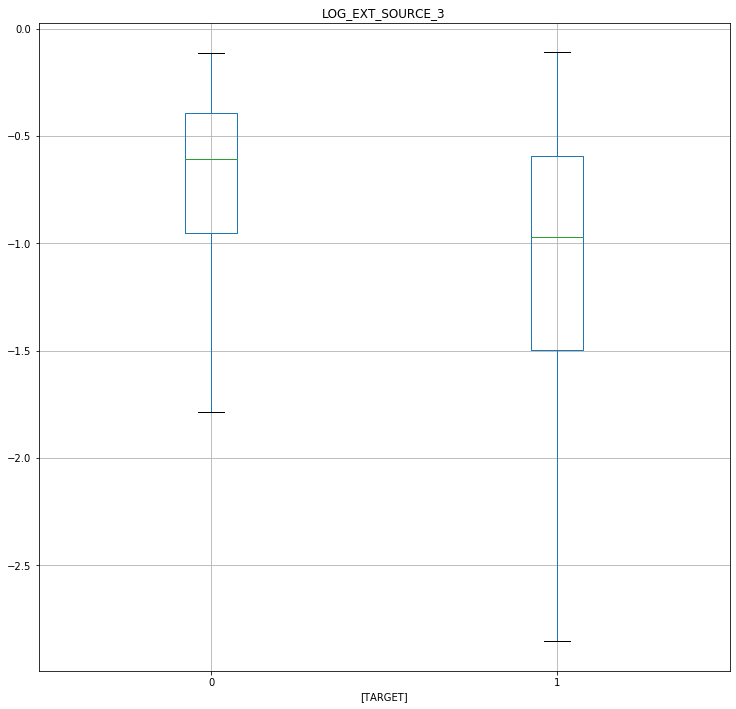

In [22]:
app_train['LOG_EXT_SOURCE_3'] = np.log(app_train['EXT_SOURCE_3'])
plt_column = 'LOG_EXT_SOURCE_3'
plt_by = ['TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()